In [1]:
%load_ext autoreload
%autoreload 2

from https://www.microscopyu.com/microscopy-basics/properties-of-microscope-objectives 

100x oil: NA = 1.4 

60x air: NA = 0.95 

40x air: NA = 0.95 

20x air: NA = 0.75 

10x air: NA = 0.45 

4x air: NA = 0.2 

2x air: NA = 0.1 

In [2]:
# import sys
# sys.path.insert(1, '/home/georgeos/Documents/GitHub/SyMBac/') # Not needed if you installed SyMBac using pip

from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images
real_image = get_sample_images()["E. coli 100x"]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\robho\OneDrive\Desktop\Uni Work\Year 4\project2\SyMBac\cell_simulation.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [1]:
for image in get_sample_images():
    print(get_sample_images()[image].shape)
    print(image)

NameError: name 'get_sample_images' is not defined

In [4]:
from interpolate import linear_interpolate
from interpolate import extend_background
from interpolate import mask_interpolate
from scipy.ndimage import gaussian_filter
from SyMBac.drawing import make_images_same_shape

# 100x

In [5]:
pmcs = np.array([1,10/6,10/4,10/3.5,10/3,10/2.5,10/2,10/1])*0.0655

In [6]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_convs = pmcs,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [7]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
sim_list = my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

pmc 0.0655
pmc 0.10916666666666668
pmc 0.16375
pmc 0.18714285714285717
pmc 0.21833333333333335
pmc 0.262
pmc 0.3275
pmc 0.655


In [ ]:
another_sim = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_convs = 0.0655,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)
ananother_sim = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_convs = 0.0655*2,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)
anananother_sim = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_convs = 0.0655*4,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [44]:
another_sim.run_simulation()
ananother_sim.run_simulation()
anananother_sim.run_simulation()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [45]:
another_sim.draw_simulation_OPL()
ananother_sim.draw_simulation_OPL()
anananother_sim.draw_simulation_OPL()

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

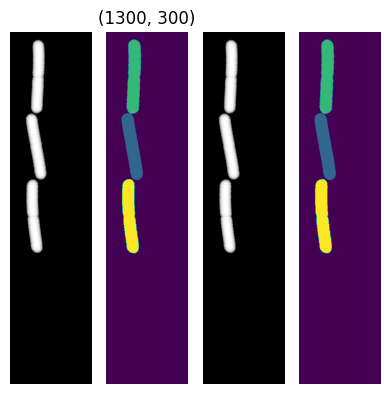

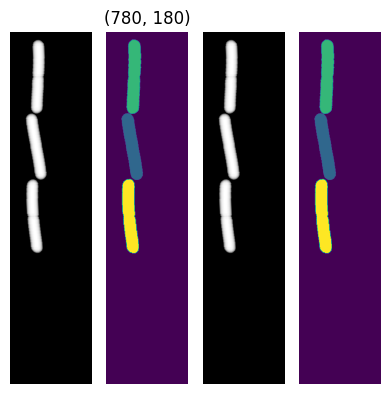

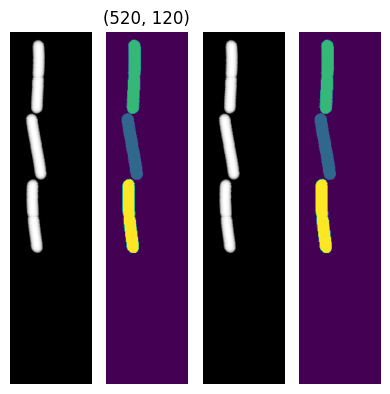

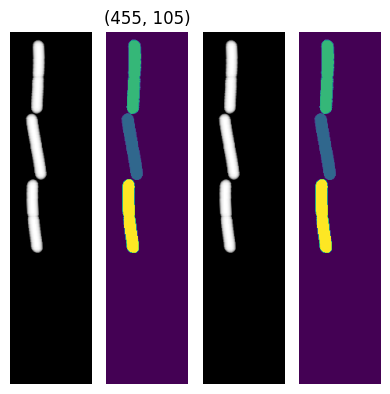

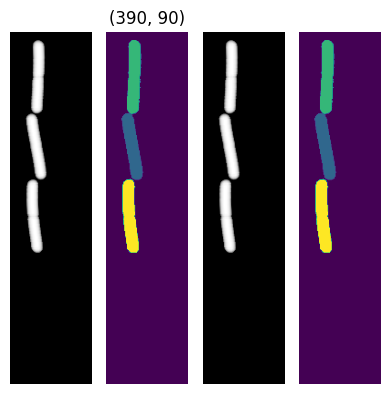

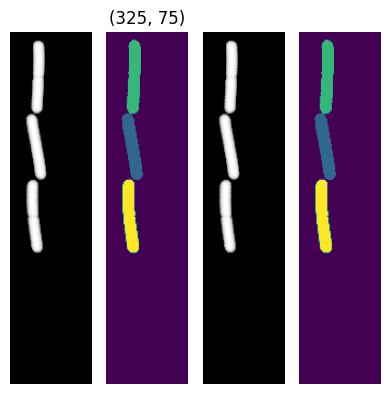

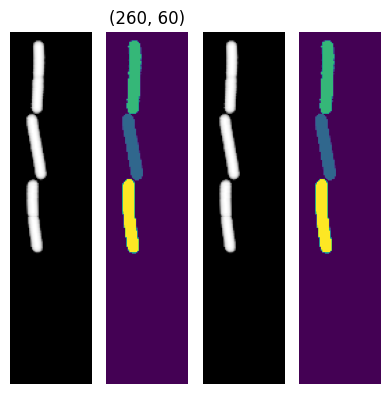

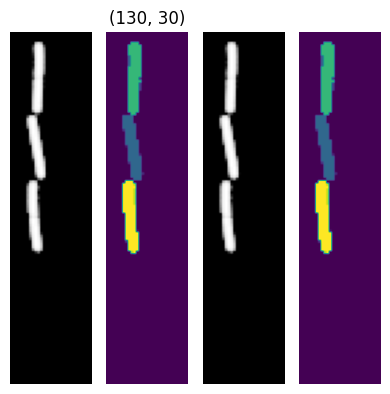

In [9]:
import matplotlib.pyplot as plt
what = 6
for my_simulation in sim_list:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(4,10))
    ax1.imshow(my_simulation.OPL_scenes[-what], cmap="Greys_r")
    ax1.axis("off")
    ax2.imshow(my_simulation.masks[-what])
    ax2.axis("off")
    ax2.set_title(my_simulation.OPL_scenes[-what].shape)
    ax3.imshow(linear_interpolate(sim_list[0].OPL_scenes[-what],my_simulation.OPL_scenes[-what].shape), cmap="Greys_r")
    ax3.axis("off")
    ax4.imshow(linear_interpolate(sim_list[0].masks[-what],my_simulation.OPL_scenes[-what].shape))
    ax4.axis("off")
    plt.tight_layout()
plt.show()

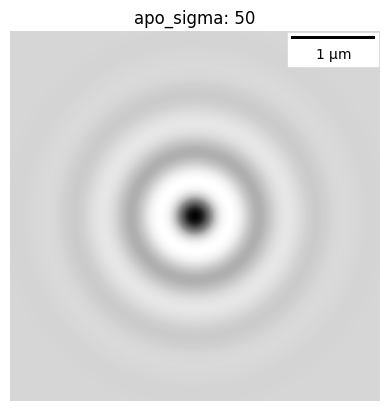

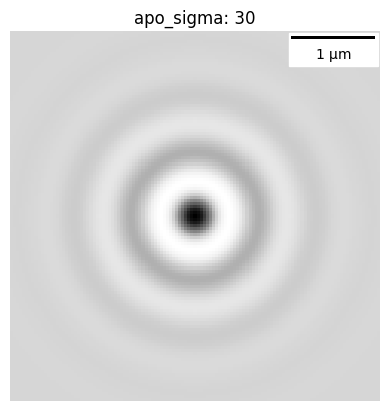

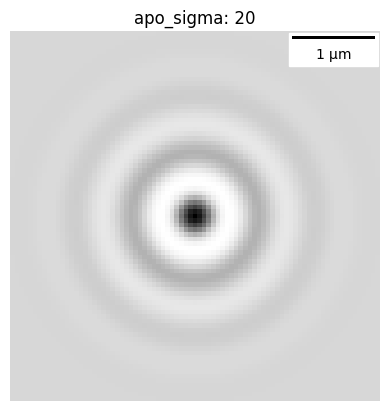

In [9]:
# A 2D phase contrast kernel
kern_list = []
for radius, sig, pmc in [[100,50,pmcs[0]],[60,30,pmcs[1]],[40,20,pmcs[2]]]:
    my_kernel = PSF_generator(
        radius = radius,
        wavelength = 0.6,
        NA = 1.45,
        n = 1.5,
        resize_amount = 3,
        pix_mic_conv = pmc,
        apo_sigma = sig,
        mode="phase contrast",
        condenser = "Ph3")
    kern_list.append(my_kernel)
    my_kernel.calculate_PSF()
    my_kernel.plot_PSF()

In [82]:
real_image60 = linear_interpolate(gaussian_filter(real_image,sigma=1),(int(real_image.shape[0]*6/10),int(real_image.shape[1]*6/10)))
real_image40 = linear_interpolate(gaussian_filter(real_image,sigma=1.5),(int(real_image.shape[0]*4/10),int(real_image.shape[1]*4/10)))
real_image_list = [real_image, real_image60, real_image40]

In [83]:
my_renderer = Renderer(simulation=sim_list[0], 
                       PSF_list = kern_list, 
                       real_image_list = real_image_list) # linear_interpolate(real_image,(154,28))

In [84]:
ml = np.array(pd.read_csv("media_label.csv",header=None))
cl = np.array(pd.read_csv("cell_label.csv",header=None))
dl = np.array(pd.read_csv("device_label.csv",header=None))

In [85]:
my_renderer.select_intensity_napari(ml,cl,dl)

In [86]:
1/10 + 2/10 == 3/10

False

In [87]:
# pd.DataFrame(my_renderer.media_label.data).to_csv("media_label.csv",header=0,index=False)
# pd.DataFrame(my_renderer.cell_label.data).to_csv("cell_label.csv",header=0,index=False)
# pd.DataFrame(my_renderer.device_label.data).to_csv("device_label.csv",header=0,index=False)

In [118]:
my_renderer.optimise_synth_image(manual_update=True)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [119]:
my_renderer.save_params()

In [120]:
my_renderer.optimise_synth_image(manual_update=True)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [91]:
my_renderer.save_params()

In [92]:
my_renderer.optimise_synth_image(manual_update=True)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [96]:
(my_renderer.params_list)

[{'media_multiplier': 89,
  'cell_multiplier': 6.05,
  'device_multiplier': 1,
  'sigma': 5.2,
  'scene_no': 61,
  'match_fourier': False,
  'match_histogram': True,
  'match_noise': True,
  'debug_plot': True,
  'noise_var': 0.0,
  'defocus': 1.8,
  'number': 0,
  'generate': False},
 {'media_multiplier': 185,
  'cell_multiplier': 1.21,
  'device_multiplier': 1,
  'sigma': 5.2,
  'scene_no': 61,
  'match_fourier': True,
  'match_histogram': True,
  'match_noise': True,
  'debug_plot': True,
  'noise_var': 0.0,
  'defocus': 1.8,
  'number': 1,
  'generate': False},
 {'media_multiplier': 88,
  'cell_multiplier': 2.5,
  'device_multiplier': 1,
  'sigma': 5.2,
  'scene_no': 61,
  'match_fourier': True,
  'match_histogram': True,
  'match_noise': False,
  'debug_plot': True,
  'noise_var': 0.0024,
  'defocus': 1.8,
  'number': 2,
  'generate': False}]

In [235]:
os0,os1,ts0,ts1 = 50,50,30,30
a, b = np.meshgrid(np.linspace(0,os0-1,ts0), np.linspace(0,os1-1,ts1),indexing='ij')
points = np.concatenate((a.reshape(ts0,ts1,1),b.reshape(ts0,ts1,1)),axis=-1)
for point in points[np.any(points%1 == 0,axis=-1)]:
    print(point)

[0. 0.]
[0.         1.68965517]
[0.         3.37931034]
[0.         5.06896552]
[0.         6.75862069]
[0.         8.44827586]
[ 0.         10.13793103]
[ 0.         11.82758621]
[ 0.         13.51724138]
[ 0.         15.20689655]
[ 0.         16.89655172]
[ 0.        18.5862069]
[ 0.         20.27586207]
[ 0.         21.96551724]
[ 0.         23.65517241]
[ 0.         25.34482759]
[ 0.         27.03448276]
[ 0.         28.72413793]
[ 0.        30.4137931]
[ 0.         32.10344828]
[ 0.         33.79310345]
[ 0.         35.48275862]
[ 0.         37.17241379]
[ 0.         38.86206897]
[ 0.         40.55172414]
[ 0.         42.24137931]
[ 0.         43.93103448]
[ 0.         45.62068966]
[ 0.         47.31034483]
[ 0. 49.]
[1.68965517 0.        ]
[ 1.68965517 49.        ]
[3.37931034 0.        ]
[ 3.37931034 49.        ]
[5.06896552 0.        ]
[ 5.06896552 49.        ]
[6.75862069 0.        ]
[ 6.75862069 49.        ]
[8.44827586 0.        ]
[ 8.44827586 49.        ]
[10.13793103  0.  

In [37]:
my_renderer = Renderer(simulation = sim_list[0], PSF = kern_list[1], real_image = real_image)
my_renderer.select_intensity_napari(ml,cl,dl)
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [38]:
my_renderer = Renderer(simulation = sim_list[0], PSF = kern_list[2], real_image = real_image)
my_renderer.select_intensity_napari(ml,cl,dl)
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [39]:
my_renderer = Renderer(simulation = sim_list[0], PSF = kern_list[3], real_image = real_image)
my_renderer.select_intensity_napari(ml,cl,dl)
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [116]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 10, save_dir="data/simultaneous v1", in_series=False)















































































































Sample generation: 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


# 60x

In [124]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_convs = 0.1,
    gravity=0,
    phys_iters=5,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [125]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [126]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

In [29]:
for i in range(len(my_simulation.masks)):
    if my_simulation.masks[i].shape != (1212,196):
        print(my_simulation.masks[i].shape)

(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)
(766, 145)

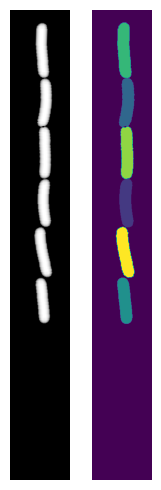

In [20]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


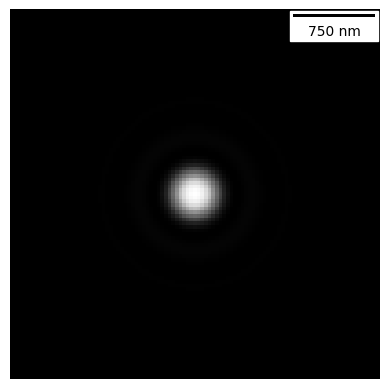

In [21]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.95,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.1,
    apo_sigma = None,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [22]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image)

AYOOOOOOOOOOOOO
(256, 46)
(507, 53)


In [23]:
my_renderer.select_intensity_napari(ml,cl,dl)

In [24]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [25]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 500, save_dir="fluo/60x test", in_series=False)

Sample generation:   0%|          | 0/500 [00:00<?, ?it/s]

HOOLABOOLA


Sample generation:   0%|          | 2/500 [00:00<01:45,  4.73it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:   1%|          | 4/500 [00:00<01:06,  7.48it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   1%|          | 6/500 [00:00<00:54,  9.07it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:   2%|▏         | 10/500 [00:01<00:46, 10.55it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   2%|▏         | 12/500 [00:01<00:44, 10.90it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:   3%|▎         | 14/500 [00:01<00:44, 11.05it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   3%|▎         | 16/500 [00:01<00:43, 11.23it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:   4%|▍         | 20/500 [00:02<00:41, 11.63it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   4%|▍         | 22/500 [00:02<00:40, 11.71it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   5%|▌         | 26/500 [00:02<00:39, 11.90it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   6%|▌         | 28/500 [00:02<00:39, 11.95it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   6%|▋         | 32/500 [00:02<00:39, 12.00it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   7%|▋         | 34/500 [00:03<00:39, 11.95it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   8%|▊         | 38/500 [00:03<00:39, 11.76it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:   8%|▊         | 40/500 [00:03<00:38, 11.84it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   8%|▊         | 42/500 [00:03<00:38, 11.88it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:   9%|▉         | 44/500 [00:04<00:38, 11.89it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  10%|▉         | 48/500 [00:04<00:38, 11.70it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  10%|█         | 50/500 [00:04<00:38, 11.76it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  11%|█         | 54/500 [00:04<00:37, 11.90it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  11%|█         | 56/500 [00:05<00:37, 11.94it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  12%|█▏        | 58/500 [00:05<00:37, 11.91it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  12%|█▏        | 60/500 [00:05<00:36, 11.95it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  13%|█▎        | 64/500 [00:05<00:36, 11.99it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  13%|█▎        | 66/500 [00:05<00:36, 12.01it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  14%|█▎        | 68/500 [00:06<00:36, 11.94it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  14%|█▍        | 72/500 [00:06<00:35, 11.91it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  15%|█▍        | 74/500 [00:06<00:35, 11.91it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  16%|█▌        | 78/500 [00:06<00:35, 11.97it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  16%|█▌        | 80/500 [00:07<00:35, 11.93it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  16%|█▋        | 82/500 [00:07<00:35, 11.92it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  17%|█▋        | 84/500 [00:07<00:34, 11.92it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  18%|█▊        | 88/500 [00:07<00:34, 11.97it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  18%|█▊        | 90/500 [00:07<00:34, 11.97it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  19%|█▉        | 94/500 [00:08<00:33, 11.97it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  19%|█▉        | 96/500 [00:08<00:33, 11.97it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  20%|█▉        | 98/500 [00:08<00:33, 12.00it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  20%|██        | 102/500 [00:08<00:33, 11.99it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  21%|██        | 104/500 [00:09<00:33, 11.98it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  22%|██▏       | 108/500 [00:09<00:32, 12.01it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  22%|██▏       | 110/500 [00:09<00:32, 11.96it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  23%|██▎       | 114/500 [00:09<00:32, 11.92it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  23%|██▎       | 116/500 [00:10<00:31, 12.04it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  24%|██▎       | 118/500 [00:10<00:31, 12.15it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  24%|██▍       | 122/500 [00:10<00:30, 12.23it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  25%|██▍       | 124/500 [00:10<00:30, 12.22it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  26%|██▌       | 128/500 [00:11<00:30, 12.25it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  26%|██▌       | 130/500 [00:11<00:30, 12.28it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  27%|██▋       | 134/500 [00:11<00:29, 12.32it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  27%|██▋       | 136/500 [00:11<00:29, 12.28it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  28%|██▊       | 138/500 [00:11<00:29, 12.26it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  28%|██▊       | 142/500 [00:12<00:29, 12.27it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  29%|██▉       | 144/500 [00:12<00:28, 12.28it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  30%|██▉       | 148/500 [00:12<00:28, 12.30it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  30%|███       | 150/500 [00:12<00:28, 12.29it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  30%|███       | 152/500 [00:12<00:28, 12.29it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  31%|███       | 156/500 [00:13<00:27, 12.29it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  32%|███▏      | 158/500 [00:13<00:27, 12.29it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  32%|███▏      | 162/500 [00:13<00:27, 12.28it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  33%|███▎      | 164/500 [00:13<00:27, 12.32it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  33%|███▎      | 166/500 [00:14<00:27, 12.33it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  34%|███▍      | 170/500 [00:14<00:26, 12.28it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  34%|███▍      | 172/500 [00:14<00:26, 12.35it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  35%|███▌      | 176/500 [00:14<00:26, 12.35it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  36%|███▌      | 178/500 [00:15<00:26, 12.35it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  36%|███▋      | 182/500 [00:15<00:25, 12.28it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  37%|███▋      | 184/500 [00:15<00:25, 12.25it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  37%|███▋      | 186/500 [00:15<00:25, 12.23it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  38%|███▊      | 190/500 [00:16<00:25, 12.20it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  38%|███▊      | 192/500 [00:16<00:25, 12.22it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  39%|███▉      | 194/500 [00:16<00:25, 12.19it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  40%|███▉      | 198/500 [00:16<00:24, 12.20it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  40%|████      | 200/500 [00:16<00:24, 12.18it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  40%|████      | 202/500 [00:17<00:24, 12.14it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  41%|████      | 206/500 [00:17<00:24, 12.21it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  42%|████▏     | 208/500 [00:17<00:23, 12.18it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  42%|████▏     | 210/500 [00:17<00:23, 12.21it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  43%|████▎     | 214/500 [00:18<00:23, 12.28it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  43%|████▎     | 216/500 [00:18<00:23, 12.16it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  44%|████▎     | 218/500 [00:18<00:23, 12.20it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  44%|████▍     | 222/500 [00:18<00:22, 12.16it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  45%|████▍     | 224/500 [00:18<00:22, 12.11it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  46%|████▌     | 228/500 [00:19<00:22, 12.13it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  46%|████▌     | 230/500 [00:19<00:22, 12.17it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  47%|████▋     | 234/500 [00:19<00:21, 12.19it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  47%|████▋     | 236/500 [00:19<00:21, 12.15it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  48%|████▊     | 238/500 [00:20<00:21, 12.10it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  48%|████▊     | 242/500 [00:20<00:21, 12.03it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  49%|████▉     | 244/500 [00:20<00:21, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  50%|████▉     | 248/500 [00:20<00:20, 12.16it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  50%|█████     | 250/500 [00:21<00:20, 12.13it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  50%|█████     | 252/500 [00:21<00:20, 12.19it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  51%|█████     | 256/500 [00:21<00:20, 12.12it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  52%|█████▏    | 258/500 [00:21<00:19, 12.12it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  52%|█████▏    | 262/500 [00:21<00:19, 12.14it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  53%|█████▎    | 264/500 [00:22<00:19, 12.18it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  53%|█████▎    | 266/500 [00:22<00:19, 12.16it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  54%|█████▍    | 270/500 [00:22<00:18, 12.12it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  54%|█████▍    | 272/500 [00:22<00:18, 12.14it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  55%|█████▍    | 274/500 [00:22<00:18, 12.09it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  56%|█████▌    | 278/500 [00:23<00:18, 12.14it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  56%|█████▌    | 280/500 [00:23<00:18, 12.20it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  57%|█████▋    | 284/500 [00:23<00:17, 12.17it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  57%|█████▋    | 286/500 [00:23<00:17, 12.18it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  58%|█████▊    | 288/500 [00:24<00:17, 12.13it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  58%|█████▊    | 290/500 [00:24<00:17, 12.15it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  59%|█████▉    | 294/500 [00:24<00:17, 12.10it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  59%|█████▉    | 296/500 [00:24<00:16, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  60%|██████    | 300/500 [00:25<00:16, 12.14it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  60%|██████    | 302/500 [00:25<00:16, 12.11it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  61%|██████    | 304/500 [00:25<00:16, 12.16it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  62%|██████▏   | 308/500 [00:25<00:15, 12.06it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  62%|██████▏   | 310/500 [00:25<00:15, 11.95it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  62%|██████▏   | 312/500 [00:26<00:15, 12.04it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  63%|██████▎   | 316/500 [00:26<00:15, 11.89it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  64%|██████▎   | 318/500 [00:26<00:15, 11.98it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  64%|██████▍   | 322/500 [00:26<00:14, 12.06it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  65%|██████▍   | 324/500 [00:27<00:14, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  66%|██████▌   | 328/500 [00:27<00:14, 12.00it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  66%|██████▌   | 330/500 [00:27<00:14, 11.97it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  67%|██████▋   | 334/500 [00:27<00:13, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  67%|██████▋   | 336/500 [00:28<00:13, 12.09it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  68%|██████▊   | 340/500 [00:28<00:13, 12.04it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  68%|██████▊   | 342/500 [00:28<00:13, 12.07it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  69%|██████▉   | 346/500 [00:28<00:12, 12.16it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  70%|██████▉   | 348/500 [00:29<00:12, 12.08it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  70%|███████   | 350/500 [00:29<00:12, 12.07it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  70%|███████   | 352/500 [00:29<00:12, 12.11it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  71%|███████   | 356/500 [00:29<00:11, 12.06it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  72%|███████▏  | 358/500 [00:29<00:11, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  72%|███████▏  | 362/500 [00:30<00:11, 12.16it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  73%|███████▎  | 364/500 [00:30<00:11, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  74%|███████▎  | 368/500 [00:30<00:10, 12.16it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  74%|███████▍  | 370/500 [00:30<00:10, 12.11it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  75%|███████▍  | 374/500 [00:31<00:10, 12.14it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  75%|███████▌  | 376/500 [00:31<00:10, 12.16it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  76%|███████▌  | 378/500 [00:31<00:10, 12.13it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  76%|███████▋  | 382/500 [00:31<00:09, 12.11it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  77%|███████▋  | 384/500 [00:32<00:09, 12.16it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  77%|███████▋  | 386/500 [00:32<00:09, 12.15it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  78%|███████▊  | 390/500 [00:32<00:09, 12.06it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  78%|███████▊  | 392/500 [00:32<00:08, 12.06it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  79%|███████▉  | 396/500 [00:33<00:08, 12.03it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  80%|███████▉  | 398/500 [00:33<00:08, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  80%|████████  | 400/500 [00:33<00:08, 12.05it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  81%|████████  | 404/500 [00:33<00:07, 12.09it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  81%|████████  | 406/500 [00:33<00:07, 12.10it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  82%|████████▏ | 410/500 [00:34<00:07, 12.10it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  82%|████████▏ | 412/500 [00:34<00:07, 12.11it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  83%|████████▎ | 416/500 [00:34<00:06, 12.06it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  84%|████████▎ | 418/500 [00:34<00:06, 12.10it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  84%|████████▍ | 420/500 [00:35<00:06, 12.09it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  85%|████████▍ | 424/500 [00:35<00:06, 12.17it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  85%|████████▌ | 426/500 [00:35<00:06, 12.07it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  86%|████████▌ | 430/500 [00:35<00:05, 11.94it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  86%|████████▋ | 432/500 [00:36<00:05, 11.86it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  87%|████████▋ | 434/500 [00:36<00:05, 11.83it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  87%|████████▋ | 436/500 [00:36<00:05, 11.88it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  88%|████████▊ | 440/500 [00:36<00:05, 11.95it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  88%|████████▊ | 442/500 [00:36<00:04, 11.92it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  89%|████████▉ | 446/500 [00:37<00:04, 12.01it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  90%|████████▉ | 448/500 [00:37<00:04, 11.85it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  90%|█████████ | 450/500 [00:37<00:04, 11.91it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  91%|█████████ | 454/500 [00:37<00:03, 11.94it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  91%|█████████ | 456/500 [00:38<00:03, 11.97it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  92%|█████████▏| 460/500 [00:38<00:03, 12.01it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  92%|█████████▏| 462/500 [00:38<00:03, 12.04it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  93%|█████████▎| 464/500 [00:38<00:02, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  94%|█████████▎| 468/500 [00:39<00:02, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  94%|█████████▍| 470/500 [00:39<00:02, 12.09it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  94%|█████████▍| 472/500 [00:39<00:02, 12.10it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  95%|█████████▌| 476/500 [00:39<00:01, 12.09it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  96%|█████████▌| 478/500 [00:39<00:01, 11.99it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  96%|█████████▋| 482/500 [00:40<00:01, 11.99it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  97%|█████████▋| 484/500 [00:40<00:01, 11.99it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  98%|█████████▊| 488/500 [00:40<00:00, 12.11it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  98%|█████████▊| 490/500 [00:40<00:00, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation:  99%|█████████▉| 494/500 [00:41<00:00, 12.08it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


Sample generation:  99%|█████████▉| 496/500 [00:41<00:00, 12.00it/s]

HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation: 100%|█████████▉| 498/500 [00:41<00:00, 11.97it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
HOOLABOOLA


Sample generation: 100%|██████████| 500/500 [00:41<00:00, 11.98it/s]

(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)
(256, 46)
(507, 53)


# 40x

In [26]:
real_image40 = np.zeros(np.array(real_image.shape)//2)
a,b = real_image40.shape
for i in range(a):
    for j in range(b):
        real_image40[i,j] = real_image[2*i,2*j]

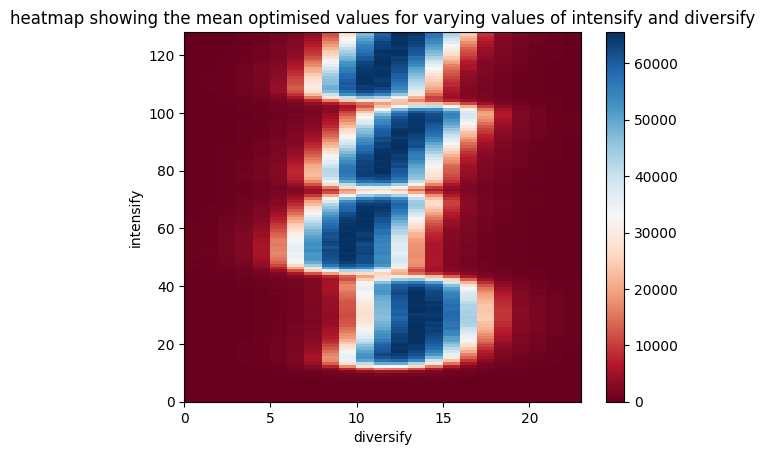

In [27]:
plt.pcolor(real_image40, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [29]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.16,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [30]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [31]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

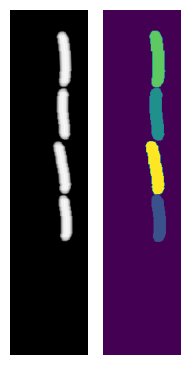

In [32]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


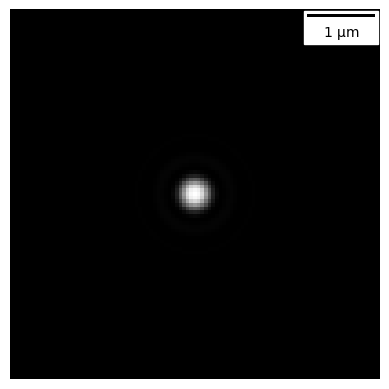

In [33]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.95,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.16,
    apo_sigma = None,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [34]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image40)

AYOOOOOOOOOOOOO
(128, 23)
(194, 43)


In [35]:
my_renderer.select_intensity_napari()

In [37]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [39]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 400, save_dir="fluo/40x test", in_series=False)

Sample generation:   0%|          | 1/400 [00:00<01:03,  6.33it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:   1%|▏         | 5/400 [00:00<00:27, 14.47it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:   3%|▎         | 12/400 [00:00<00:16, 24.18it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:   4%|▍         | 16/400 [00:00<00:14, 27.40it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:   6%|▌         | 24/400 [00:00<00:12, 30.74it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:   8%|▊         | 32/400 [00:01<00:11, 31.94it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  10%|█         | 40/400 [00:01<00:11, 32.59it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)


Sample generation:  12%|█▏        | 48/400 [00:01<00:10, 32.56it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  13%|█▎        | 52/400 [00:01<00:10, 32.71it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  15%|█▌        | 60/400 [00:02<00:10, 33.31it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  17%|█▋        | 68/400 [00:02<00:10, 32.98it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  18%|█▊        | 72/400 [00:02<00:09, 32.92it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  20%|██        | 80/400 [00:02<00:09, 32.80it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  22%|██▏       | 88/400 [00:02<00:09, 32.28it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  23%|██▎       | 92/400 [00:03<00:09, 31.88it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  25%|██▌       | 100/400 [00:03<00:09, 32.39it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  26%|██▌       | 104/400 [00:03<00:09, 32.66it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  28%|██▊       | 112/400 [00:03<00:08, 32.58it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  30%|███       | 120/400 [00:03<00:08, 32.61it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  32%|███▏      | 128/400 [00:04<00:08, 32.62it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  33%|███▎      | 132/400 [00:04<00:08, 32.35it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  35%|███▌      | 140/400 [00:04<00:08, 32.43it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  37%|███▋      | 148/400 [00:04<00:07, 33.01it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  39%|███▉      | 156/400 [00:05<00:07, 32.68it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  41%|████      | 164/400 [00:05<00:07, 33.35it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  42%|████▏     | 168/400 [00:05<00:06, 33.77it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  44%|████▍     | 176/400 [00:05<00:06, 34.10it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  46%|████▌     | 184/400 [00:05<00:06, 34.17it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  48%|████▊     | 192/400 [00:06<00:06, 34.24it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  49%|████▉     | 196/400 [00:06<00:05, 34.14it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  51%|█████     | 204/400 [00:06<00:05, 34.10it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  53%|█████▎    | 212/400 [00:06<00:05, 34.17it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  55%|█████▌    | 220/400 [00:06<00:05, 34.21it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  57%|█████▋    | 228/400 [00:07<00:05, 33.73it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  59%|█████▉    | 236/400 [00:07<00:04, 34.05it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  61%|██████    | 244/400 [00:07<00:04, 34.30it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  62%|██████▏   | 248/400 [00:07<00:04, 34.18it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  64%|██████▍   | 256/400 [00:07<00:04, 34.21it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  66%|██████▌   | 264/400 [00:08<00:04, 33.95it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  68%|██████▊   | 272/400 [00:08<00:03, 34.13it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  69%|██████▉   | 276/400 [00:08<00:03, 33.89it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  71%|███████   | 284/400 [00:08<00:03, 34.02it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  73%|███████▎  | 292/400 [00:09<00:03, 34.10it/s]

(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  74%|███████▍  | 296/400 [00:09<00:03, 33.70it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  76%|███████▌  | 304/400 [00:09<00:02, 32.85it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  78%|███████▊  | 312/400 [00:09<00:02, 32.88it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  80%|████████  | 320/400 [00:09<00:02, 33.35it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  82%|████████▏ | 328/400 [00:10<00:02, 33.71it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  84%|████████▍ | 336/400 [00:10<00:01, 33.95it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  85%|████████▌ | 340/400 [00:10<00:01, 34.20it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  87%|████████▋ | 348/400 [00:10<00:01, 34.19it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  89%|████████▉ | 356/400 [00:10<00:01, 34.37it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  91%|█████████ | 364/400 [00:11<00:01, 34.22it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  93%|█████████▎| 372/400 [00:11<00:00, 34.29it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  95%|█████████▌| 380/400 [00:11<00:00, 34.45it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation:  96%|█████████▌| 384/400 [00:11<00:00, 34.37it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


Sample generation:  98%|█████████▊| 392/400 [00:11<00:00, 34.43it/s]

HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA


Sample generation: 100%|██████████| 400/400 [00:12<00:00, 32.79it/s]

(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
HOOLABOOLA
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)
(128, 23)
(194, 43)


# 35x

In [22]:
real_image35 = np.zeros((np.array(real_image.shape)//[256/172,46/39]).astype(int))
a,b = real_image35.shape
for i in range(a):
    for j in range(b):
        real_image35[i,j] = real_image[int(256/172*i),int(46/39*j)]

In [6]:
plt.pcolor(real_image35, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

NameError: name 'plt' is not defined

In [7]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.18,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [8]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

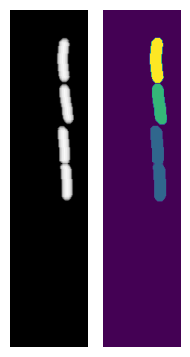

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


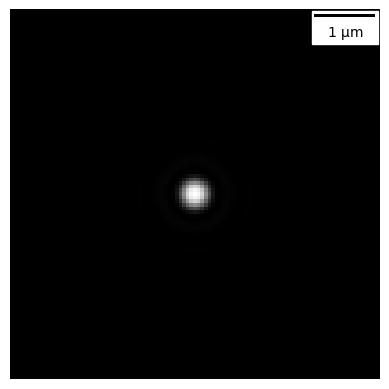

In [11]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.9,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.18,
    apo_sigma = None,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [23]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image35)

AYOOOOOOOOOOOOO
(172, 38)
(173, 40)


In [24]:
my_renderer.select_intensity_napari()

In [25]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [26]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 500, save_dir="fluo/35x test", in_series=False)

Sample generation:   0%|          | 0/500 [00:00<?, ?it/s]

HOOLABOOLA


Sample generation:   1%|          | 4/500 [00:00<00:46, 10.69it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:   2%|▏         | 11/500 [00:00<00:21, 22.56it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)


Sample generation:   4%|▍         | 19/500 [00:00<00:15, 30.33it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:   5%|▌         | 27/500 [00:01<00:13, 33.88it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:   7%|▋         | 35/500 [00:01<00:12, 35.87it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:   9%|▊         | 43/500 [00:01<00:12, 36.75it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  10%|█         | 51/500 [00:01<00:11, 37.43it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  12%|█▏        | 59/500 [00:01<00:11, 37.84it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  13%|█▎        | 67/500 [00:02<00:11, 37.39it/s]

HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  15%|█▌        | 75/500 [00:02<00:11, 37.21it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)


Sample generation:  17%|█▋        | 83/500 [00:02<00:10, 37.92it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  18%|█▊        | 91/500 [00:02<00:10, 38.07it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  20%|█▉        | 99/500 [00:02<00:10, 37.90it/s]

HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)


Sample generation:  21%|██▏       | 107/500 [00:03<00:10, 37.60it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  23%|██▎       | 115/500 [00:03<00:10, 37.34it/s]

HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  25%|██▍       | 123/500 [00:03<00:10, 37.44it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  26%|██▌       | 131/500 [00:03<00:09, 37.38it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)


Sample generation:  28%|██▊       | 139/500 [00:04<00:09, 36.78it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  29%|██▉       | 147/500 [00:04<00:09, 36.81it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  31%|███       | 155/500 [00:04<00:09, 37.24it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  33%|███▎      | 163/500 [00:04<00:08, 37.46it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  34%|███▍      | 171/500 [00:04<00:08, 37.60it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  36%|███▌      | 179/500 [00:05<00:08, 37.01it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  37%|███▋      | 187/500 [00:05<00:08, 37.30it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  39%|███▉      | 195/500 [00:05<00:08, 37.81it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  41%|████      | 203/500 [00:05<00:07, 38.06it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)


Sample generation:  42%|████▏     | 211/500 [00:05<00:07, 36.91it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  44%|████▍     | 219/500 [00:06<00:07, 37.08it/s]

(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  45%|████▌     | 227/500 [00:06<00:07, 37.30it/s]

(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  47%|████▋     | 235/500 [00:06<00:07, 37.37it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  49%|████▊     | 243/500 [00:06<00:06, 37.98it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  50%|█████     | 251/500 [00:07<00:06, 36.98it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  52%|█████▏    | 259/500 [00:07<00:06, 37.04it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)


Sample generation:  53%|█████▎    | 267/500 [00:07<00:06, 37.17it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  55%|█████▌    | 275/500 [00:07<00:06, 37.32it/s]

HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  57%|█████▋    | 283/500 [00:07<00:05, 37.35it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  58%|█████▊    | 291/500 [00:08<00:05, 36.83it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  60%|█████▉    | 299/500 [00:08<00:05, 37.04it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  61%|██████▏   | 307/500 [00:08<00:05, 37.24it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  63%|██████▎   | 315/500 [00:08<00:04, 37.52it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  65%|██████▍   | 323/500 [00:09<00:04, 36.89it/s]

HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  66%|██████▌   | 331/500 [00:09<00:04, 37.25it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  68%|██████▊   | 339/500 [00:09<00:04, 37.35it/s]

(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  69%|██████▉   | 347/500 [00:09<00:04, 37.80it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  71%|███████   | 355/500 [00:09<00:03, 37.44it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  73%|███████▎  | 363/500 [00:10<00:03, 37.77it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)


Sample generation:  74%|███████▍  | 371/500 [00:10<00:03, 37.75it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  76%|███████▌  | 379/500 [00:10<00:03, 38.13it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  77%|███████▋  | 387/500 [00:10<00:02, 38.41it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  80%|███████▉  | 399/500 [00:11<00:02, 38.24it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  81%|████████  | 403/500 [00:11<00:02, 37.98it/s]

HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  82%|████████▏ | 411/500 [00:11<00:02, 37.39it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  84%|████████▍ | 419/500 [00:11<00:02, 37.79it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  85%|████████▌ | 427/500 [00:11<00:01, 38.10it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  87%|████████▋ | 435/500 [00:11<00:01, 38.17it/s]

HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)


Sample generation:  89%|████████▊ | 443/500 [00:12<00:01, 38.06it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  90%|█████████ | 451/500 [00:12<00:01, 38.12it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  92%|█████████▏| 459/500 [00:12<00:01, 38.37it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  93%|█████████▎| 467/500 [00:12<00:00, 38.57it/s]

HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  95%|█████████▌| 475/500 [00:13<00:00, 37.92it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation:  97%|█████████▋| 483/500 [00:13<00:00, 37.72it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)


Sample generation:  98%|█████████▊| 491/500 [00:13<00:00, 37.87it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA


Sample generation: 100%|██████████| 500/500 [00:13<00:00, 36.60it/s]

(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
HOOLABOOLA
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)
(172, 38)
(173, 40)


# 30x

In [5]:
real_image30 = np.zeros((np.array(real_image.shape)//[256/147,46/36]).astype(int))
a,b = real_image30.shape
for i in range(a):
    for j in range(b):
        real_image30[i,j] = real_image[int(256/147*i),int(46/36*j)]

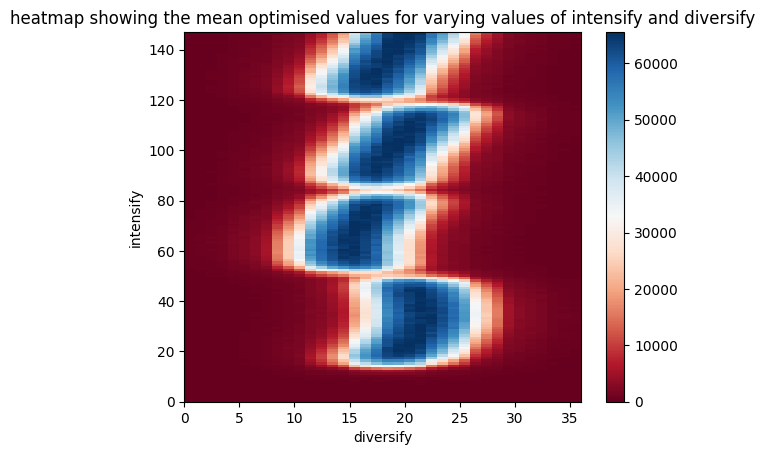

In [6]:
plt.pcolor(real_image30, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [7]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.21,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [8]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

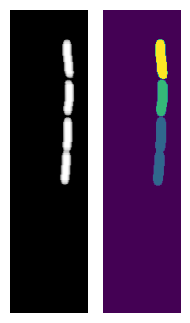

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


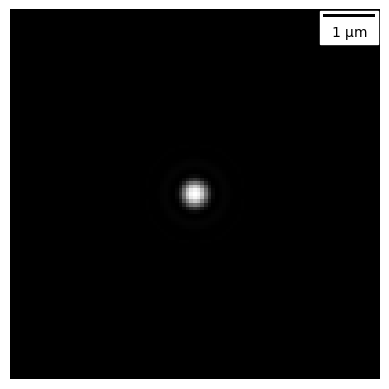

In [11]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.85,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.21,
    apo_sigma = None,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [12]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image30)

AYOOOOOOOOOOOOO
(147, 36)
(149, 37)


In [13]:
my_renderer.select_intensity_napari()

In [14]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [15]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 400, save_dir="fluo/30x test", in_series=False)

Sample generation:   0%|          | 0/400 [00:00<?, ?it/s]

HOOLABOOLA


Sample generation:   1%|          | 4/400 [00:00<00:32, 12.31it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:   3%|▎         | 13/400 [00:00<00:14, 27.64it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:   6%|▌         | 23/400 [00:00<00:10, 36.05it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:   8%|▊         | 33/400 [00:01<00:09, 40.22it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)


Sample generation:  10%|▉         | 38/400 [00:01<00:08, 41.44it/s]

HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
H

Sample generation:  12%|█▏        | 48/400 [00:01<00:08, 41.79it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)


Sample generation:  14%|█▍        | 58/400 [00:01<00:08, 41.20it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:  17%|█▋        | 68/400 [00:01<00:07, 43.70it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation:  20%|█▉        | 78/400 [00:02<00:07, 44.82it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(

Sample generation:  21%|██        | 83/400 [00:02<00:07, 45.13it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)


Sample generation:  23%|██▎       | 93/400 [00:02<00:06, 45.17it/s]

HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
H

Sample generation:  26%|██▌       | 103/400 [00:02<00:06, 44.99it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:  28%|██▊       | 113/400 [00:02<00:06, 45.02it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation:  31%|███       | 123/400 [00:03<00:06, 45.28it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation:  33%|███▎      | 133/400 [00:03<00:05, 45.11it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation:  36%|███▌      | 143/400 [00:03<00:05, 44.06it/s]

HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
H

Sample generation:  38%|███▊      | 153/400 [00:03<00:05, 43.79it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:  40%|███▉      | 158/400 [00:03<00:05, 43.92it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:  42%|████▏     | 168/400 [00:04<00:05, 43.73it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:  44%|████▍     | 178/400 [00:04<00:05, 43.64it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation:  47%|████▋     | 188/400 [00:04<00:04, 44.58it/s]

HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
H

Sample generation:  50%|████▉     | 198/400 [00:04<00:04, 44.38it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:  51%|█████     | 203/400 [00:04<00:04, 42.53it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)


Sample generation:  53%|█████▎    | 213/400 [00:05<00:04, 43.62it/s]

HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:  56%|█████▌    | 223/400 [00:05<00:04, 42.96it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:  58%|█████▊    | 233/400 [00:05<00:03, 42.81it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation:  61%|██████    | 243/400 [00:05<00:03, 43.42it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)


Sample generation:  62%|██████▏   | 248/400 [00:05<00:03, 43.67it/s]

HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
H

Sample generation:  64%|██████▍   | 258/400 [00:06<00:03, 44.31it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation:  67%|██████▋   | 268/400 [00:06<00:02, 44.48it/s]

(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)


Sample generation:  70%|██████▉   | 278/400 [00:06<00:02, 44.64it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(

Sample generation:  72%|███████▏  | 288/400 [00:06<00:02, 45.46it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation:  74%|███████▍  | 298/400 [00:07<00:02, 45.64it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation:  77%|███████▋  | 308/400 [00:07<00:02, 45.42it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation:  80%|███████▉  | 318/400 [00:07<00:01, 45.14it/s]

HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)


Sample generation:  81%|████████  | 323/400 [00:07<00:01, 44.99it/s]

HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)


Sample generation:  83%|████████▎ | 333/400 [00:07<00:01, 44.77it/s]

HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)


Sample generation:  86%|████████▌ | 343/400 [00:08<00:01, 44.84it/s]

HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
H

Sample generation:  88%|████████▊ | 353/400 [00:08<00:01, 44.33it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:  90%|████████▉ | 358/400 [00:08<00:00, 44.54it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)


Sample generation:  92%|█████████▏| 368/400 [00:08<00:00, 44.84it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(

Sample generation:  94%|█████████▍| 378/400 [00:08<00:00, 44.61it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA


Sample generation:  97%|█████████▋| 388/400 [00:09<00:00, 45.08it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(

Sample generation: 100%|█████████▉| 398/400 [00:09<00:00, 44.53it/s]

(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
HOOLABOOLA
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)
(147, 36)
(149, 37)


Sample generation: 100%|██████████| 400/400 [00:09<00:00, 42.75it/s]


# 25x

In [33]:
real_image25 = np.zeros((np.array(real_image.shape)//[256/122,46/27]).astype(int))
a,b = real_image25.shape
for i in range(a):
    for j in range(b):
        real_image25[i,j] = real_image[int(256/122*i),int(46/27*j)]

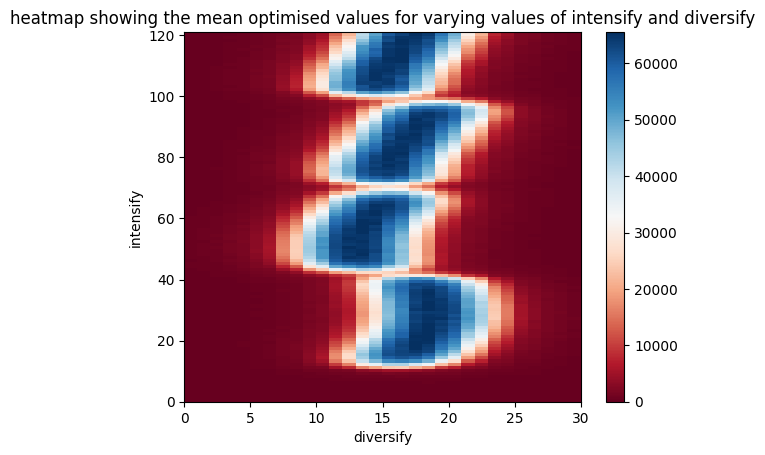

In [17]:
plt.pcolor(real_image25, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [19]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.26,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [20]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [21]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

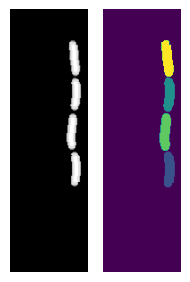

In [22]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


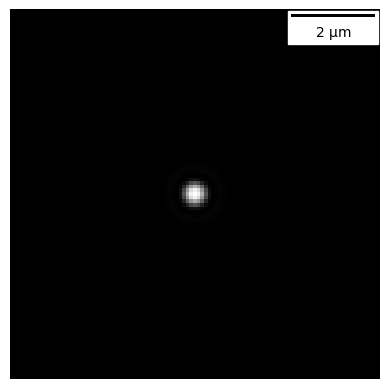

In [23]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.8,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.26,
    apo_sigma = None,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [34]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image25)

AYOOOOOOOOOOOOO
(121, 26)
(122, 28)


In [35]:
my_renderer.select_intensity_napari()

In [36]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [38]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 400, save_dir="fluo/25x test", in_series=False)

Sample generation:   0%|          | 1/400 [00:00<01:15,  5.26it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)


Sample generation:   1%|▏         | 5/400 [00:00<00:20, 19.58it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA


Sample generation:   4%|▍         | 15/400 [00:00<00:10, 36.20it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:   6%|▋         | 26/400 [00:00<00:08, 44.26it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
H

Sample generation:   9%|▉         | 37/400 [00:00<00:07, 47.35it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
H

Sample generation:  12%|█▏        | 48/400 [00:01<00:07, 48.87it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  15%|█▍        | 59/400 [00:01<00:06, 49.13it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
H

Sample generation:  18%|█▊        | 70/400 [00:01<00:06, 49.63it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(

Sample generation:  19%|█▉        | 76/400 [00:01<00:06, 50.43it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
H

Sample generation:  22%|██▏       | 88/400 [00:01<00:06, 50.85it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  25%|██▌       | 100/400 [00:02<00:05, 53.17it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  28%|██▊       | 112/400 [00:02<00:05, 53.68it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
H

Sample generation:  31%|███       | 124/400 [00:02<00:05, 54.54it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  34%|███▍      | 136/400 [00:02<00:04, 55.11it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(

Sample generation:  37%|███▋      | 148/400 [00:03<00:04, 53.54it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)


Sample generation:  38%|███▊      | 154/400 [00:03<00:04, 53.84it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
H

Sample generation:  42%|████▏     | 166/400 [00:03<00:04, 54.42it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
H

Sample generation:  44%|████▍     | 178/400 [00:03<00:04, 52.68it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(

Sample generation:  48%|████▊     | 190/400 [00:03<00:03, 53.94it/s]

HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
H

Sample generation:  50%|█████     | 202/400 [00:04<00:03, 55.16it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  54%|█████▎    | 214/400 [00:04<00:03, 57.02it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  56%|█████▋    | 226/400 [00:04<00:03, 57.79it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(

Sample generation:  60%|██████    | 240/400 [00:04<00:02, 59.21it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(

Sample generation:  63%|██████▎   | 253/400 [00:04<00:02, 59.36it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  66%|██████▋   | 265/400 [00:05<00:02, 58.86it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  69%|██████▉   | 277/400 [00:05<00:02, 58.50it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(

Sample generation:  72%|███████▏  | 289/400 [00:05<00:01, 57.12it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  76%|███████▌  | 302/400 [00:05<00:01, 58.38it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  78%|███████▊  | 314/400 [00:05<00:01, 58.39it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  82%|████████▏ | 326/400 [00:06<00:01, 58.22it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  84%|████████▍ | 338/400 [00:06<00:01, 57.93it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(

Sample generation:  88%|████████▊ | 352/400 [00:06<00:00, 59.50it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  92%|█████████▏| 366/400 [00:06<00:00, 60.10it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  95%|█████████▍| 379/400 [00:07<00:00, 59.67it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation:  98%|█████████▊| 391/400 [00:07<00:00, 57.58it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(

Sample generation: 100%|██████████| 400/400 [00:07<00:00, 53.85it/s]

(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
HOOLABOOLA
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)
(121, 26)
(122, 28)


# 20x

In [4]:
real_image20 = np.zeros((np.array(real_image.shape)//[256/100,46/30]).astype(int))
a,b = real_image20.shape
for i in range(a):
    for j in range(b):
        real_image20[i,j] = real_image[int(2.56*i),int(46/30*j)]

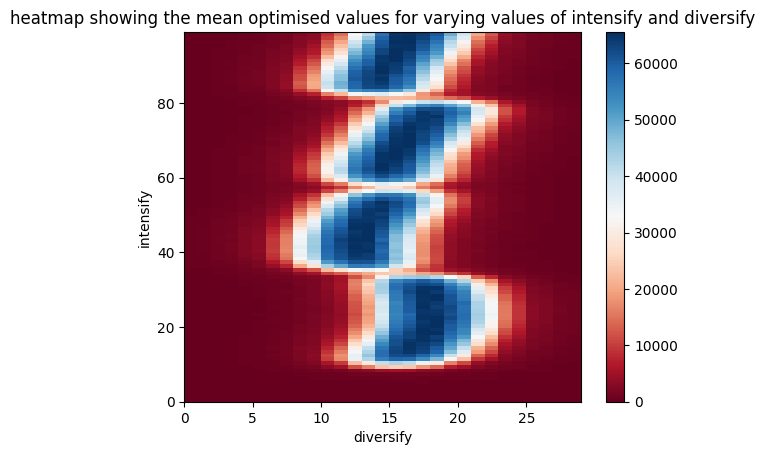

In [5]:
plt.pcolor(real_image20, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [6]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.32,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [7]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

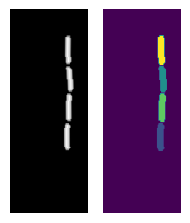

In [9]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


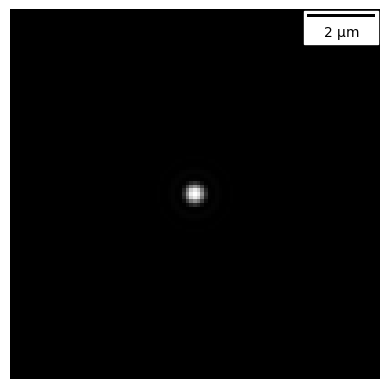

In [10]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.75,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.32,
    apo_sigma = None,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [11]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image20)

AYOOOOOOOOOOOOO
(99, 29)
(100, 33)


In [12]:
my_renderer.select_intensity_napari()

In [13]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [14]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 400, save_dir="fluo/20x test", in_series=False)

Sample generation:   0%|          | 2/400 [00:00<00:32, 12.42it/s]

HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA


Sample generation:   2%|▏         | 9/400 [00:00<00:14, 26.97it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA


Sample generation:   5%|▌         | 20/400 [00:00<00:09, 41.92it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:   8%|▊         | 33/400 [00:00<00:06, 52.77it/s]

HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 3

Sample generation:  12%|█▏        | 47/400 [00:01<00:06, 58.01it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  15%|█▌        | 60/400 [00:01<00:05, 59.41it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOO

Sample generation:  18%|█▊        | 74/400 [00:01<00:05, 61.08it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  22%|██▏       | 87/400 [00:01<00:05, 57.67it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  25%|██▍       | 99/400 [00:01<00:05, 58.34it/s]

HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 3

Sample generation:  26%|██▋       | 106/400 [00:02<00:04, 59.30it/s]

HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 3

Sample generation:  30%|███       | 120/400 [00:02<00:04, 61.52it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  34%|███▎      | 134/400 [00:02<00:04, 62.84it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  37%|███▋      | 148/400 [00:02<00:04, 62.31it/s]

HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 3

Sample generation:  40%|████      | 162/400 [00:02<00:03, 62.36it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  44%|████▍     | 176/400 [00:03<00:03, 63.06it/s]

HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 3

Sample generation:  48%|████▊     | 190/400 [00:03<00:03, 63.40it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  51%|█████     | 204/400 [00:03<00:03, 63.47it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  55%|█████▍    | 218/400 [00:03<00:02, 63.73it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  58%|█████▊    | 232/400 [00:04<00:02, 63.93it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  62%|██████▏   | 246/400 [00:04<00:02, 64.32it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  65%|██████▌   | 260/400 [00:04<00:02, 63.57it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  67%|██████▋   | 267/400 [00:04<00:02, 62.57it/s]

(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 3

Sample generation:  70%|███████   | 281/400 [00:04<00:01, 61.48it/s]

HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 3

Sample generation:  74%|███████▍  | 295/400 [00:05<00:01, 62.23it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  77%|███████▋  | 309/400 [00:05<00:01, 62.48it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  81%|████████  | 323/400 [00:05<00:01, 62.17it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  84%|████████▍ | 337/400 [00:05<00:01, 62.38it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  88%|████████▊ | 351/400 [00:05<00:00, 63.36it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  90%|████████▉ | 358/400 [00:06<00:00, 62.76it/s]

HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 3

Sample generation:  93%|█████████▎| 372/400 [00:06<00:00, 62.91it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation:  96%|█████████▋| 386/400 [00:06<00:00, 63.23it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)

Sample generation: 100%|██████████| 400/400 [00:06<00:00, 59.77it/s]

(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
HOOLABOOLA
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)
(99, 29)
(100, 33)


# 10x

In [ ]:
real_image20 = np.zeros((np.array(real_image.shape)//[256/100,46/30]).astype(int))
a,b = real_image20.shape
for i in range(a):
    for j in range(b):
        real_image20[i,j] = real_image[int(2.56*i),int(46/30*j)]

In [ ]:
plt.pcolor(real_image20, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [63]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.65,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [64]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [65]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

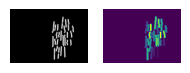

In [66]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()